In [1]:
import vtk
import numpy as np
import sys
import math
import os
import glob
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
raw_file = '../../data/Isabel_pressure_velocity_qvapor.vti'
raw_var1 = 'Pressure'
raw_var2 = 'Velocity'
raw_var3 = 'QVapor'

sampled_field1 = '../../analysis/recon_data/isabel_recon_Pressure_linear.vti'
sampled_field2 = '../../analysis/recon_data/isabel_recon_Velocity_linear.vti'
sampled_field3 = '../../analysis/recon_data/isabel_recon_QVapor_linear.vti'
recon_var = 'ImageScalars'

VOI = [115,160,100,150,0,49]

##########################################
raw_var = raw_var1
sampled_field = sampled_field1

In [3]:
reader = vtk.vtkXMLImageDataReader()
reader.SetFileName(raw_file)
reader.Update()
raw_data = reader.GetOutput()

reader1 = vtk.vtkXMLImageDataReader()
reader1.SetFileName(sampled_field)
reader1.Update()
recon_data1 = reader1.GetOutput()

In [4]:
extractVOI = vtk.vtkExtractVOI()
extractVOI.SetInputData(raw_data)
extractVOI.SetVOI(VOI[0],VOI[1],VOI[2],VOI[3],VOI[4],VOI[5])
extractVOI.Update()
raw_voi = extractVOI.GetOutput()

extractVOI1 = vtk.vtkExtractVOI()
extractVOI1.SetInputData(recon_data1)
extractVOI1.SetVOI(VOI[0],VOI[1],VOI[2],VOI[3],VOI[4],VOI[5])
extractVOI1.Update()
recon_voi = extractVOI1.GetOutput()

numPts = raw_voi.GetPointData().GetArray(raw_var).GetNumberOfTuples()

raw_vals = np.zeros(numPts)
recon_vals = np.zeros(numPts)

for i in range(numPts):
    raw_vals[i] = raw_voi.GetPointData().GetArray(raw_var).GetTuple1(i)
    recon_vals[i] = recon_voi.GetPointData().GetArray(recon_var).GetTuple1(i)

In [7]:
# compute correlation
corr = stats.pearsonr(raw_vals, recon_vals)
print corr[0]

0.9997983402762128


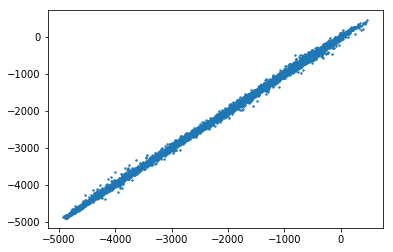

In [6]:
plt.scatter(raw_vals, recon_vals, s=2)
plt.show()